# NLP Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

plt.style.use('ggplot')

import nltk

# link to dataset:  https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews

In [6]:
csv_file_path = 'Musical_instruments_reviews.csv'
df = pd.read_csv(csv_file_path)
df.shape

(10261, 9)

In [10]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [9]:
df.columns
#overall is score
#reviewText is text
#summary is short text

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [12]:
#get the text column, 1st entry
df['reviewText'].values[0]


'The Best Cable'

In [15]:
print(df.shape)
#over 10k records, lets reduce it...

(10261, 9)


In [16]:
#reduce dataset for processing
df = df.head(500)

# EDA

Text(0.5, 0, 'Review Stars')

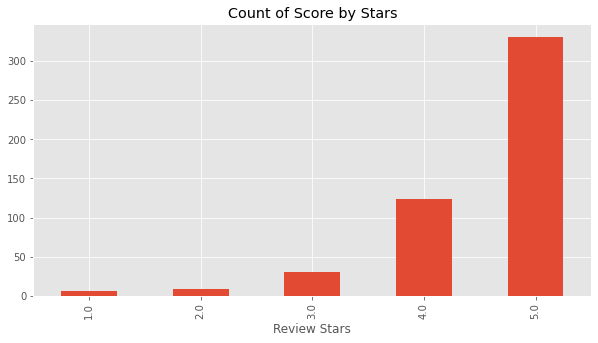

In [17]:
ax = df['overall'].value_counts().sort_index().plot(kind='bar',title='Count of Score by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
#biased toward positive reviews

# Basic NLTK

In [40]:
example = df['reviewText'][50]
print(example)

I didn't expect this cable to be so thin. It's easily 1/2 the thickness of any guitar cable I've used. Not sure about long-term durability or signal loss/interference. If I had the foresight I'd spend a couple extra bucks on a thicker cable.  Still, it works and was inexpensive.EDIT: 6 months later and it's dead already.  Wire frayed at the right angle jack.  You get what you pay for.


In [30]:
#get first 20 tokens
tokens = nltk.word_tokenize(example)
tokens[:20]
#little smarter than just splitting on spaces

['I',
 'did',
 "n't",
 'expect',
 'this',
 'cable',
 'to',
 'be',
 'so',
 'thin',
 '.',
 'It',
 "'s",
 'easily',
 '1/2',
 'the',
 'thickness',
 'of',
 'any',
 'guitar']

In [31]:
#find part of speach for each of these words
# link explains the abriviations 
# https://www.guru99.com/pos-tagging-chunking-nltk.html
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('I', 'PRP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('expect', 'VB'),
 ('this', 'DT'),
 ('cable', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('so', 'RB'),
 ('thin', 'JJ'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('easily', 'RB'),
 ('1/2', 'CD'),
 ('the', 'DT'),
 ('thickness', 'NN'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('guitar', 'NN')]

# VADER for sentiment analysis (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

#### take all the words in the sentence and assign positive, negative, or neutrality of sentence. 
#### Does not account for relationships of words
#### Stop words are removed
#### Each word is scored and combined to a total score (0-1 scores)

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar tracker

sia = SentimentIntensityAnalyzer() 

In [68]:
#EX 
#compound is aggregate of other 3 from -1 to 1
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [39]:
print(example)

I didn't expect this cable to be so thin. It's easily 1/2 the thickness of any guitar cable I've used. Not sure about long-term durability or signal loss/interference. If I had the foresight I'd spend a couple extra bucks on a thicker cable.  Still, it works and was inexpensive.EDIT: 6 months later and it's dead already.  Wire frayed at the right angle jack.  You get what you pay for.


In [41]:
sia.polarity_scores(example)

{'neg': 0.109, 'neu': 0.853, 'pos': 0.038, 'compound': -0.6122}

### Run the polarity score on the entire dataset using a loop


In [57]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [69]:
#res is now a dict with scores, we now want a pd df
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.057,0.790,0.153,0.6903
2,0.000,0.819,0.181,0.9588
3,0.113,0.858,0.029,-0.7003
4,0.055,0.746,0.199,0.5859
5,0.000,0.791,0.209,0.7650
...,...,...,...,...
496,0.000,0.942,0.058,0.3400
497,0.049,0.951,0.000,-0.2960
498,0.035,0.812,0.153,0.9567
499,0.000,0.864,0.136,0.6249


## Make the index a column for merging vaders and df, also rename columns for later comparison

In [72]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'}) #reset and rename index so we can merge it onto original df
vaders = vaders.merge(df,how='left')
vaders = vaders.rename(columns={'neg':'VADER_neg','neu': 'VADER_neu','pos':'VADER_pos','compound':'VADER_compound'})
                                              
                                     

In [73]:
#now we have sentiment score and metadata
vaders.head()

,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,0.057,0.790,0.153,0.6903,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,2,0.000,0.819,0.181,0.9588,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,3,0.113,0.858,0.029,-0.7003,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,4,0.055,0.746,0.199,0.5859,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,5,0.000,0.791,0.209,0.7650,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
#assume 5 corresponds to positive text; 1 to negative

## Plot the VADER_compound against the overall rating 1-5

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

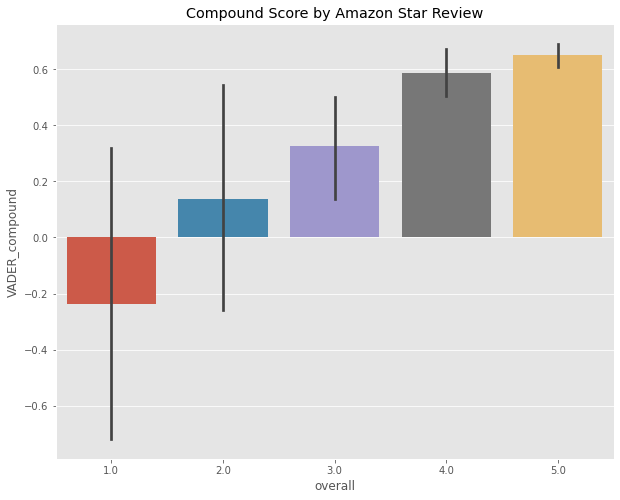

In [81]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=vaders, x='overall',y='VADER_compound')
ax.set_title('Compound Score by Amazon Star Review')
#as expected, as scores are higher, text compound score is higher

Text(0.5, 1.0, 'Negative')

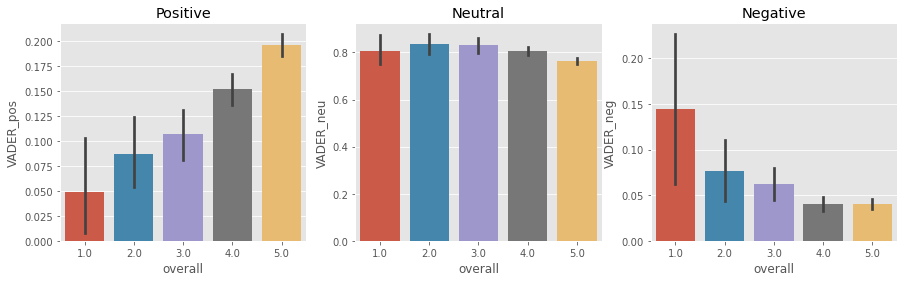

In [82]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
sns.barplot(data=vaders,x='overall',y='VADER_pos',ax=axs[0])
sns.barplot(data=vaders,x='overall',y='VADER_neu',ax=axs[1])
sns.barplot(data=vaders,x='overall',y='VADER_neg',ax=axs[2])
#plt.tight_layout()

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

In [ ]:
# this model scores each word individually but doesn't look at context ('bad ass' is good but would be scored negative)

# Roberta Pretrained Model

#### Use a model trained of large corpus of data
#### Transformer model accounts for the words AND the context related ot other words

In [83]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [84]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #specific pretrained model from huggingface from twitter
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [85]:
#VADER results on example
print(example)
sia.polarity_scores(example)

I didn't expect this cable to be so thin. It's easily 1/2 the thickness of any guitar cable I've used. Not sure about long-term durability or signal loss/interference. If I had the foresight I'd spend a couple extra bucks on a thicker cable.  Still, it works and was inexpensive.EDIT: 6 months later and it's dead already.  Wire frayed at the right angle jack.  You get what you pay for.


{'neg': 0.109, 'neu': 0.853, 'pos': 0.038, 'compound': -0.6122}

In [86]:
#Roberta results on example, first need to encode text as binary
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores) #neg, neu, pos
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_nue' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
# we see the 'example' is negative. VADER mostly scored it neu, with some neg. But Roberta scored it very neg.

{'roberta_neg': 0.34555468, 'roberta_nue': 0.45003688, 'roberta_pos': 0.20440836}


In [127]:
#now run it on a large dataset like with VADER, (use a function)

In [87]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores) #neg, neu, pos
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_nue' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [90]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Text too long, broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Text too long, broke for id 187
Text too long, broke for id 195
Text too long, broke for id 209
Text too long, broke for id 227
Text too long, broke for id 352
Text too long, broke for id 363
Text too long, broke for id 366
Text too long, broke for id 368
Text too long, broke for id 369
Text too long, broke for id 372
Text too long, broke for id 379
Text too long, broke for id 404
Text too long, broke for id 413
Text too long, broke for id 448
Text too long, broke for id 485


In [94]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'}) #reset and rename index so we can merge it onto original df
results_df = results_df.merge(df,how='left')
results_df = results_df.rename(columns={'neg':'VADER_neg','neu': 'VADER_neu','pos':'VADER_pos','compound':'VADER_compound'})

In [95]:
results_df.head()

,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,0.057,0.790,0.153,0.6903,0.013297,0.099131,0.887572,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,2,0.000,0.819,0.181,0.9588,0.010153,0.054364,0.935483,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,3,0.113,0.858,0.029,-0.7003,0.096456,0.709930,0.193614,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,4,0.055,0.746,0.199,0.5859,0.044498,0.316476,0.639025,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,5,0.000,0.791,0.209,0.7650,0.015781,0.104937,0.879281,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Compare Scores Between Models with Pairplot

In [96]:
results_df.columns

Index(['Id', 'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_compound',
       'roberta_neg', 'roberta_nue', 'roberta_pos', 'reviewerID', 'asin',
       'reviewerName', 'helpful', 'reviewText', 'overall', 'summary',
       'unixReviewTime', 'reviewTime'],
      dtype='object')

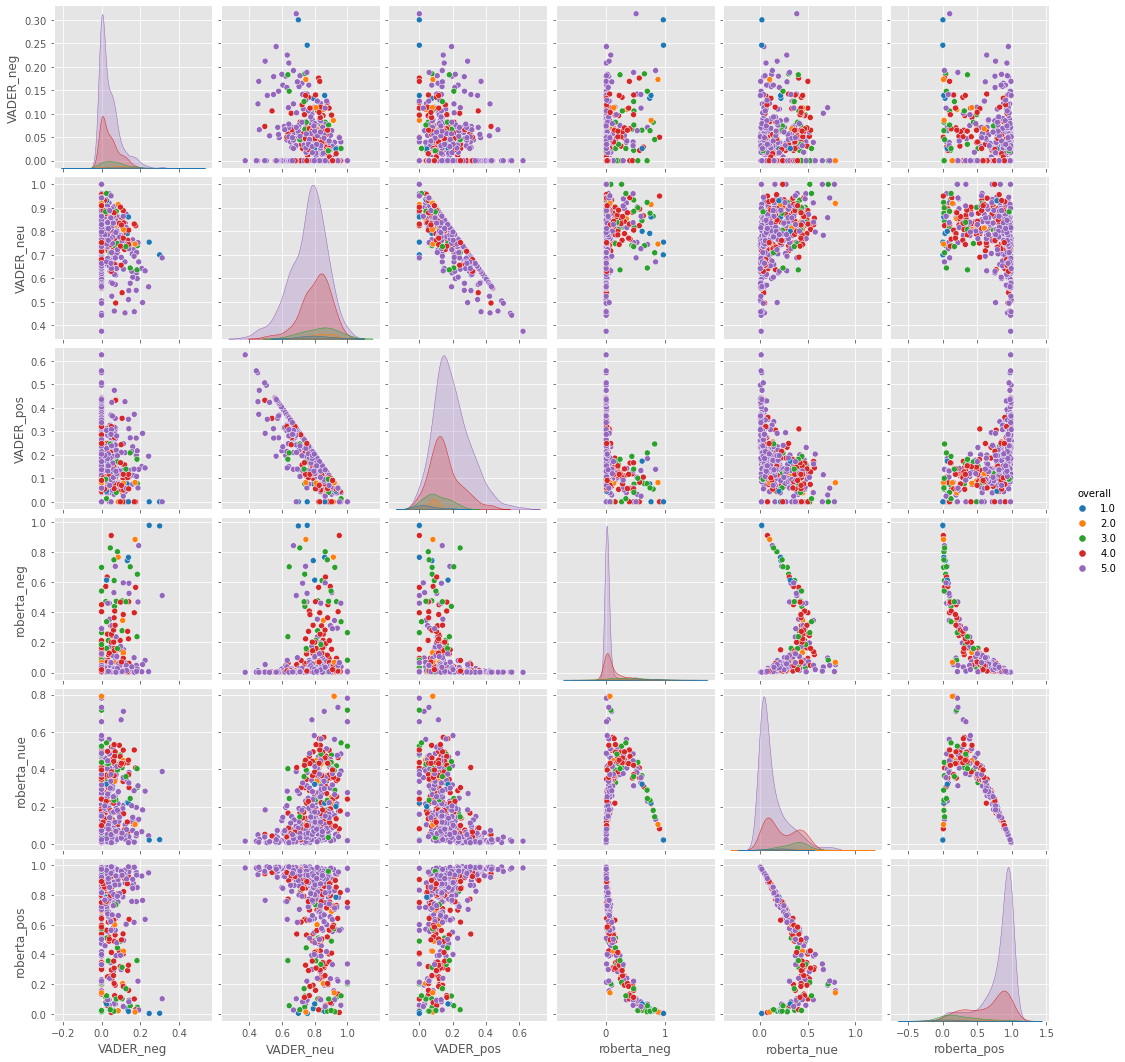

In [98]:
sns.pairplot(data=results_df,
            vars=['VADER_neg', 'VADER_neu', 'VADER_pos', 'roberta_neg', 'roberta_nue','roberta_pos'],
            hue = 'overall',
            palette='tab10')
plt.show()

# Review Examples
### roberta positive, but 1 star review

In [122]:
#sort by roberta_pos where the Score is 1. So the model rates it as a positive comment, but it had a score of 1.
results_df.query('overall==1').sort_values('roberta_pos', ascending=False).head(2)


,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
400,414,0.025,0.93,0.045,0.3182,0.013462,0.201080,0.785459,A3KBFCPNQ58YK4,B0002CZV82,Sam,"[1, 4]",Here's the deal with this pedal. It is inexpen...,1.0,Beginners Beware,1392940800,"02 21, 2014"
396,409,0.026,0.80,0.173,0.8860,0.613156,0.319881,0.066963,A2B58VXLLOFQKR,B0002CZV82,James Moulton,"[2, 30]",This is a cheap piece of junk that does what i...,1.0,It distorts,1258070400,"11 13, 2009"


In [120]:
#examine id 414 which got a score of 1 but was rated with a high roberta_pos
results_df.query('Id==414')['reviewText'].values[0]
#results_df.query('overall==1').sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

"Here's the deal with this pedal. It is inexpensive and you can get a better pedal with barely a bit more money and sometimes a little less money. In my opinion, for spending less than $100 for a distortion pedal, whether it is your first pedal or 700th pedal, a few more bucks will get you the MXR Badass distortion which has a much crisper tone to it."

### VADER positive, but 1 star review

In [123]:
#sort by VADER pos where score is 1. So the VADER model rates it positive, but it had a score of 1.
results_df.query('overall==1').sort_values('VADER_pos', ascending=False)['reviewText'].values[0]

"This is a cheap piece of junk that does what it says, it distorts, You want something to make your guitar sound like junk, this will do it. Why pedals that make your guitar sound like a piece of junk are the most popular is beyond me. This is not a boutique Distortion pedal like Hendrix would use. Boutique and distortion are an oxymoron.These things are built with heavy metal, it should last, I kinda hope it doesn't(just kidding), you want distortion, you got distortion"

### roberta negative, but 5 star review

In [124]:
# negative sentiment 5 star reviews roberta
results_df.query('overall==5').sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

'exactly what I needed to connect 2 distortion paddles to my amp...do yourself a favor, always order threw Amazon dealers! I placed an order threw onlinecarstereo.com and had to report a scam operation to my credit card co....their customer reviews were terrible, yet I made the mistake of placing n order...right before my eyes they changed their BAD reviews to add good ones....'

### VADER negative, but 5 star review

In [125]:
# negative sentiment 5 star reviews VADER
results_df.query('overall==5').sort_values('VADER_neg', ascending=False)['reviewText'].values[0]

"It's hard not to love a cord that carries electrons all the way to the end. Not sure what, other than complete failure would take stars away."

# EX

In [131]:
#roberta scores
polarity_scores_roberta('everything was horrible before I found this product')

{'roberta_neg': 0.95473915,
 'roberta_nue': 0.04173923,
 'roberta_pos': 0.0035216047}

In [132]:
#NLTK/VADER scores
sia.polarity_scores('everything was horrible before I found this product')

{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}